In [0]:
# !pip install pandas==0.25.0
import statsmodels.api as sm
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

### Problem
A company has three manufacturing plants, and company officials want to determine
whether there is a difference in the average age of workers at the three locations.
The following data are the ages of five randomly selected workers at each
plant.Determine whether there is a significant difference
in the mean ages of the workers at the three plants. Take alpha = 0.01

In [0]:
plant_a = [29,27,30,27,28]
plant_b = [32,33,31,34,30]
plant_c = [25,24,24,25,26]
alpha = 0.01

### Solution
Number of Independent Samples >= 3
</br> Assuming Population Age is Normally distributed
</br> Assuming Variance of Populations  are equal

#### One way Annova Wii be used to compare Means 

### Hypothesis Formulation
Null : Mean Age Plant A = Mean Age Plant B = Mean Age Plant C <br>
Alternate : At least one of the means is different from the others

In [0]:
df = pd.DataFrame(data = {'Plant':['A','B','C'],'Age': [plant_a,plant_b,plant_c]})
df = df.explode('Age').reset_index(drop=True)
df['Age'] = df['Age'].astype('int')
df['Plant'] = pd.Categorical(df['Plant'])
df 

,Plant,Age
0,A,29
1,A,27
2,A,30
3,A,27
4,A,28
5,B,32
6,B,33
7,B,31
8,B,34
9,B,30


In [0]:
model = ols('Age~ Plant',df).fit()
one_way_anova =  anova_lm(model)
one_way_anova

,df,sum_sq,mean_sq,F,PR(>F)
Plant,2.0,129.733333,64.866667,39.714286,0.000005
Residual,12.0,19.600000,1.633333,NaN,NaN


In [0]:
pval = one_way_anova.loc['Plant','PR(>F)']
if pval < alpha:
  print('Reject Null')
else:
  print('Fail to Reject Null')

Reject Null


### Problem
A metal-manufacturing firm wants to test the tensile strength of a given metal under
varying conditions of temperature. Suppose that in the design phase, the metal is
processed under five different temperature conditions and that random samples of
size five are taken under each temperature condition. The data follow.

In [0]:
temp_1 = [2.46,2.41,2.43,2.47,2.46]
temp_2 = [2.38,2.34,2.31,2.40,2.32,]
temp_3 = [2.51,2.48,2.46,2.49,2.50]
temp_4 = [2.49,2.47,2.48,2.46,2.44]
temp_5 = [2.56,2.57,2.53,2.55,2.55]
alpha = 0.01

### Solution
Number of Independent Samples >= 3
</br> Assuming Population Age is Normally distributed
</br> Assuming Variance of Populations  are equal

#### One way Annova Will be used to compare Means 

### Hypothesis Formulation
Null : All Means are same <br>
Alternate : At least one of the means is different from the others

In [0]:
df = pd.DataFrame(data = {'Temperature':['T1','T2','T3','T4','T5'],'Tensile': [temp_1,temp_2,temp_3,temp_4,temp_5]})
df = df.explode('Tensile').reset_index(drop=True)
df['Tensile'] = df['Tensile'].astype('float')
df['Temperature'] = pd.Categorical(df['Temperature'])
df 

,Temperature,Tensile
0,T1,2.46
1,T1,2.41
2,T1,2.43
3,T1,2.47
4,T1,2.46
5,T2,2.38
6,T2,2.34
7,T2,2.31
8,T2,2.40
9,T2,2.32


In [0]:
model = ols('Tensile~ Temperature',df).fit()
one_way_anova =  anova_lm(model)
one_way_anova

,df,sum_sq,mean_sq,F,PR(>F)
Temperature,4.0,0.108024,0.027006,43.699029,1.298181e-09
Residual,20.0,0.012360,0.000618,NaN,NaN


In [0]:
pval = one_way_anova.loc['Temperature','PR(>F)']
if pval < alpha:
  print('Reject Null')
else:
  print('Fail to Reject Null')

Reject Null


In [0]:
# As Sample Size are equal, Tukey HSD will be used to compare means
multi_comp = pairwise_tukeyhsd(df['Tensile'],df['Temperature'],alpha=alpha)
print(multi_comp.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    T1     T2   -0.096  0.001 -0.1549 -0.0371   True
    T1     T3    0.042 0.0945 -0.0169  0.1009  False
    T1     T4    0.022  0.621 -0.0369  0.0809  False
    T1     T5    0.106  0.001  0.0471  0.1649   True
    T2     T3    0.138  0.001  0.0791  0.1969   True
    T2     T4    0.118  0.001  0.0591  0.1769   True
    T2     T5    0.202  0.001  0.1431  0.2609   True
    T3     T4    -0.02 0.6896 -0.0789  0.0389  False
    T3     T5    0.064 0.0048  0.0051  0.1229   True
    T4     T5    0.084  0.001  0.0251  0.1429   True
----------------------------------------------------


**Conclusion<br>**
Comparing these differences to the value of HSD = .0588, we can determine that
the differences between groups 1 and 2 (.096), 1 and 5 (.106), 2 and 3 (.138), 2 and 4
(.118), 2 and 5 (.202), 3 and 5 (.064), and 4 and 5 (.084) are significant at alpha = 0.01

### Problem
The company conducted tread-wear tests on the tire to
determine whether there is a significant difference in tread wear if the average speed with
which the automobile is driven varies. The company set up an experiment in which the
independent variable was speed of automobile. There were three treatment levels: slow
speed (car is driven 20 miles per hour), medium speed (car is driven 40 miles per hour),
and high speed (car is driven 60 miles per hour). Company researchers realized that several
possible variables could confound the study. One of these variables was supplier. The company
uses five suppliers to provide a major component of the rubber from which the tires
are made. To control for this variable experimentally, the researchers used supplier as a
blocking variable. Fifteen tires were randomly selected for the study, three from each supplier.
Each of the three was assigned to be tested under a different speed condition. The data
are given here, along with treatment and block totals. These figures represent tire wear in
units of 10,000 miles.

### Solution
Number of Independent Samples >= 3
</br> Assuming Population tire wear is Normally distributed
</br> Assuming Variance of Populations  are equal

#### One way Annova with blocking variable Will be used to compare Means 

### Hypothesis Formulation
Null : All Means are same <br>
Alternate : At least one of the means is different from the others

In [0]:
data = pd.DataFrame( {'Supplier': [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5],
                      'Speed': ['slow','medium','fast']*5,
                      'wear':[3.7,4.5,3.1,3.4,3.9,2.8,3.5,4.1,3.0,3.2,3.5,2.6,3.9,4.8,3.4]})
data

,Supplier,Speed,wear
0,1,slow,3.7
1,1,medium,4.5
2,1,fast,3.1
3,2,slow,3.4
4,2,medium,3.9
5,2,fast,2.8
6,3,slow,3.5
7,3,medium,4.1
8,3,fast,3.0
9,4,slow,3.2


In [0]:
model = ols('wear~ Speed+ C(Supplier)',data).fit()
anova =  anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Speed,2.0,3.484000,1.742000,97.682243,0.000002
C(Supplier),4.0,1.549333,0.387333,21.719626,0.000236
Residual,8.0,0.142667,0.017833,NaN,NaN


**At least one of the population means of the treatment
levels is not the same as the others; that is, there is a significant difference in tread wear for
cars driven at different speeds**

### Problem
Some theorists believe that training warehouse workers can reduce absenteeism.*
Suppose an experimental design is structured to test this belief. Warehouses in
which training sessions have been held for workers are selected for the study. The
four types of warehouses are (1) general merchandise, (2) commodity, (3) bulk storage,
and (4) cold storage. The training sessions are differentiated by length.
Researchers identify three levels of training sessions according to the length of sessions:
(1) 1–20 days, (2) 21–50 days, and (3) more than 50 days. Three warehouse
workers are selected randomly for each particular combination of type of warehouse
and session length. The workers are monitored for the next year to determine how
many days they are absent.
determine whether there are any significant differences in effects

### Solution
Number of Independent Samples >= 3
</br> Assuming Population  is Normally distributed
</br> Assuming Variance of Populations  are equal

#### Two way Annova Will be used to compare Means 

### Hypothesis Formulation
Null : All Row Means are same <br>
Alternate : At least one of the means is different from the others<br>

Null : All Columns Means are same <br>
Alternate : At least one of the means is different from the others<br>

Null : The interaction effects are zero. <br>
Alternate : There is an interaction effect<br>

In [0]:
warehouse = (['General_Merchandise'] * 3 + ['Commodity'] * 3 + ['Bulk_Storage'] * 3 + ['Cold_Storage'] * 3 ) * 3
training =['1-20'] * 12 + ['21-50'] * 12 +['50+']*12
absent = [3,4.5,4,5,4.5,4,2.5,3,3.5,2,2,3,
         2,2.5,2,1,3,2.5,1,3,1.5,5,4.5,2.5,
         2.5,1,1.5,0,1.5,2,3.5,3.5,4,4,4.5,5]

df = pd.DataFrame({'warehouse':warehouse,'training':training,'absent':absent})
df

,warehouse,training,absent
0,General_Merchandise,1-20,3.0
1,General_Merchandise,1-20,4.5
2,General_Merchandise,1-20,4.0
3,Commodity,1-20,5.0
4,Commodity,1-20,4.5
5,Commodity,1-20,4.0
6,Bulk_Storage,1-20,2.5
7,Bulk_Storage,1-20,3.0
8,Bulk_Storage,1-20,3.5
9,Cold_Storage,1-20,2.0


In [0]:
model = ols('absent~ warehouse+training+warehouse:training',df).fit()
two_way_anova =  anova_lm(model)
two_way_anova

,df,sum_sq,mean_sq,F,PR(>F)
warehouse,3.0,6.409722,2.136574,3.456929,0.032205
training,2.0,5.013889,2.506944,4.056180,0.030372
warehouse:training,6.0,33.152778,5.525463,8.940075,0.000035
Residual,24.0,14.833333,0.618056,NaN,NaN


**The p-value for interaction is .000035. The interaction effects are significant at alpha = 0.001. The business
researcher should not bother to examine the main effects because the significant
interaction confounds the main effects.**

In [0]:
df.pivot_table(index='warehouse',columns='training',aggfunc='mean')

absent                    
training                 1-20     21-50       50+
warehouse                                        
Bulk_Storage         3.000000  1.833333  3.666667
Cold_Storage         2.333333  4.000000  4.500000
Commodity            4.500000  2.166667  1.166667
General_Merchandise  3.833333  2.166667  1.666667

In [0]:
summary = pd.crosstab(df['warehouse'], df['training'], values=df['absent'], aggfunc='mean')
summary

training,1-20,21-50,50+
warehouse,,,
Bulk_Storage,3.000000,1.833333,3.666667
Cold_Storage,2.333333,4.000000,4.500000
Commodity,4.500000,2.166667,1.166667
General_Merchandise,3.833333,2.166667,1.666667


Text(0, 0.5, 'absent')

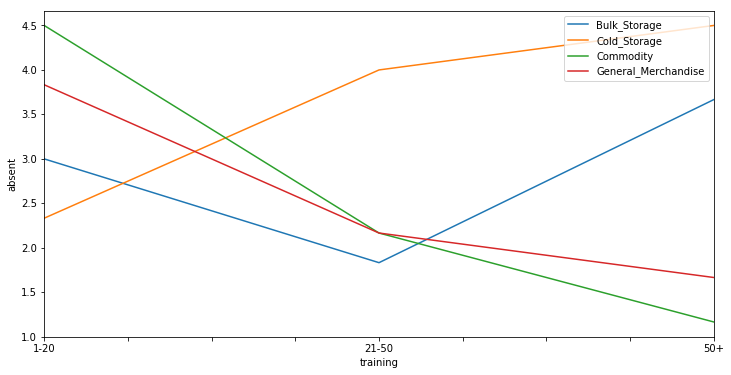

In [0]:
fig,ax = plt.subplots()
summary.T.plot(figsize=(12,6),ax=ax)
ax.legend(loc='upper right')
ax.set_ylabel('absent')